# Titanic Machine Learning Dataset

Objective: Logistic regression and SVM analysis on Titanic dataset from [kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv).

Alvee Hoque 4/25/2020




#### Feature Descriptions: 

- PassengerId: Passenger number 
- Survived: 1=survived, 0=did not survive 
- Pclass: Socio-economic status (1=upper, 2=middle, 3=lower) 
- Name: Passenger name 
- Sex: Sex 
- Age: Age
- SibSp: Number of siblings or spouse aboard
- Parch: Number of parents or children aboard
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port (C=Cherbourg, Q=Queenstown, S=Southampton)

### Basic Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
sns.set_style('darkgrid')

### Loading Data 

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
passenger_id = test['PassengerId']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data Visualization

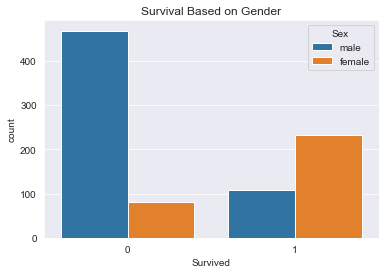

In [8]:
plt.title('Survival Based on Gender')
sns.countplot(x='Survived',hue='Sex',data=train)

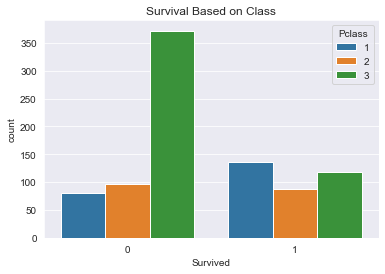

In [9]:
plt.title('Survival Based on Class')
sns.countplot(x='Survived',hue='Pclass',data=train)

Text(0.5, 1.0, 'Age Distribution')

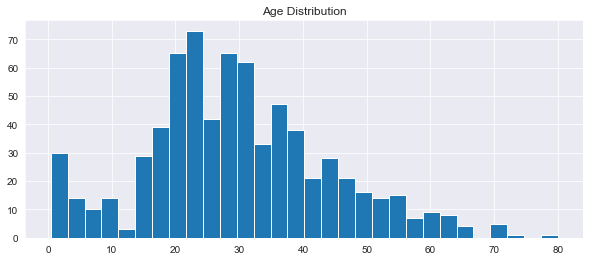

In [10]:
plt.figure(figsize=(10,4))
train['Age'].hist(bins=30,alpha=1)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Fare Distribution')

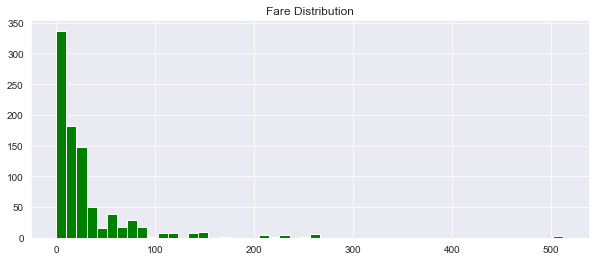

In [11]:
plt.figure(figsize=(10,4))
train['Fare'].hist(color='green',bins=50,figsize=(10,4))
plt.title('Fare Distribution')

Text(0.5, 1.0, 'Siblings and Spouse')

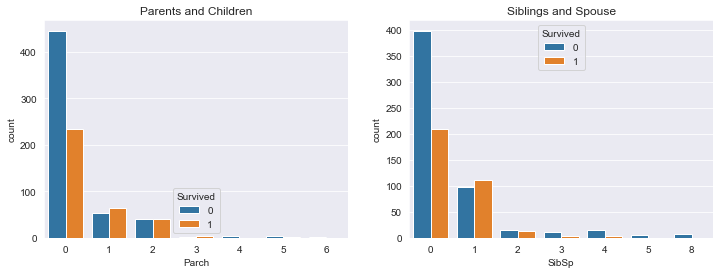

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x='Parch', data=train, ax=ax1, hue='Survived').set_title('Parents and Children')
sns.countplot(x='SibSp',data=train, ax=ax2, hue='Survived').set_title('Siblings and Spouse')

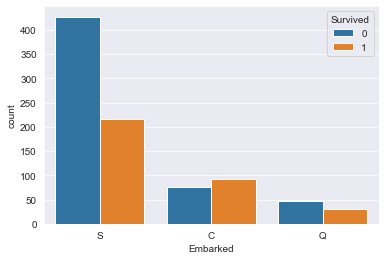

In [13]:
sns.countplot(x='Embarked', data=train, hue='Survived')

### Missing Data

Missing Data:


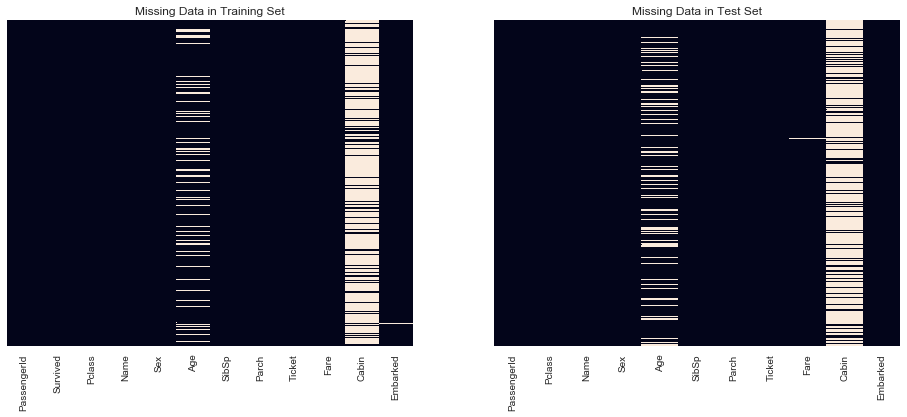

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, ax=ax1,)
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, ax=ax2)
ax1.set_title('Missing Data in Training Set')
ax2.set_title('Missing Data in Test Set')
print("Missing Data:")

#### Notes
- Missing almost all of the cabin data. Will drop column. 
- Missing ~20% of Age values. Instead of dropping column, will fill in column. 
- Can fill in embarked column missing value with Southamptom because that is where most people embarked.
- One option to fill in Age column can be to use the mean age of every class 
- Missing one Fare in test set. Will replace with the mode. 

In [15]:
# Obtaining mean age of each Pclass 
class1_age = int(train[train['Pclass'] == 1]['Age'].mean())
class2_age = int(train[train['Pclass'] == 2]['Age'].mean())
class3_age = int(train[train['Pclass'] == 3]['Age'].mean())

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return class1_age
        elif pclass == 2:
            return class2_age
        else:
            return class3_age
    else:
        return age

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [17]:
# Drop Cabin column
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Filling in embarked column with most common location
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Filling in Fare column for Test Set
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)

Text(0.5, 1, 'Missing Data in Test Set')

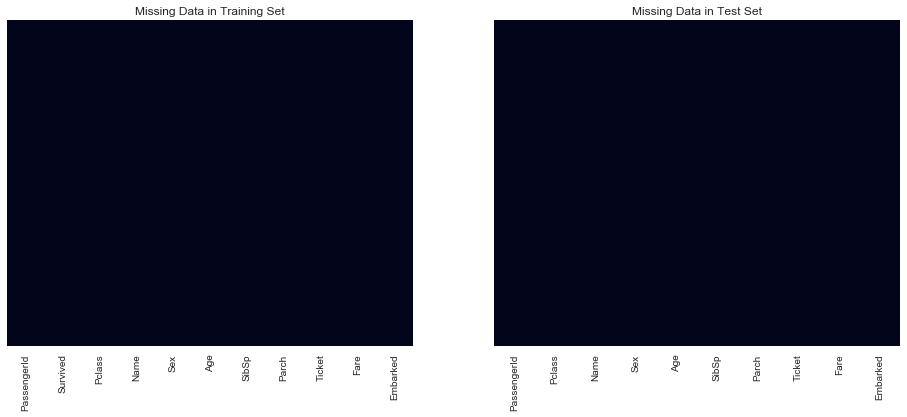

In [18]:
# Checking to see if there are any other missing values
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, ax=ax1,)
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, ax=ax2)
ax1.set_title('Missing Data in Training Set')
ax2.set_title('Missing Data in Test Set')

### Preparing Data 

In [19]:
# Get dummy variables for Sex and Embarked columns with drop first column
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

test_sex = pd.get_dummies(test['Sex'], drop_first=True)
test_embark = pd.get_dummies(test['Embarked'], drop_first=True)

# Dropping columns: Sex, Embarked, PassengerId, Name, Ticket
train.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# Keeping ID on test for submission purposes
test.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


# Join Data with new Sex and Embark columns 
train = pd.concat([train, sex, embark], axis=1)
test = pd.concat([test, test_sex, test_embark], axis=1)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Machine Learning Models

In [20]:
# Importing machine learning models 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation metrics 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [21]:
# Splitting Data
X = train.drop(columns=['Survived'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Scale Test Data
test = scaler.fit_transform(test)

In [22]:
# Models
log_regression = LogisticRegression()
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
rfc = RandomForestClassifier(criterion='entropy',n_estimators=500)

In [23]:
# Model Performance Function

def model(model, X_train, y_train, cv):
    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, cv=cv).mean()
    return cv_score

In [24]:
log_score = model(log_regression, X_train, y_train, 10)
rfc_score = model(rfc, X_train, y_train, 10)
lin_svm_score = model(svc_linear, X_train, y_train, 10)
rbf_svm_score = model(svc_rbf, X_train, y_train, 10)

In [25]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forrest', 'SVM (linear)', 'SVM (rbf)'],
                           'Cross Validation Score': [log_score,rfc_score,lin_svm_score,rbf_svm_score],
                          })
model_eval.sort_values(by='Cross Validation Score', ascending=False)

,Model,Cross Validation Score
3,SVM (rbf),0.824433
1,Random Forrest,0.804734
0,Logistic Regression,0.800509
2,SVM (linear),0.786502


In [26]:
log_pred = log_regression.predict(X_test)
rfc_pred = rfc.predict(X_test)
svml_pred = svc_linear.predict(X_test)
svmr_pred = svc_rbf.predict(X_test)

In [27]:
# Logistic Regression Classification Report
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [28]:
# Random Forrest Classification Report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       105
           1       0.69      0.68      0.68        74

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



In [29]:
# SVM (Linear) Classification Report
print(classification_report(y_test, svml_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [30]:
# SVM (RBF) Classification Report
print(classification_report(y_test, svmr_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



#### Notes
- SVM (RBF) has the best metrics and Logistic Regression has 2nd best. 

### Voting Classifier

- Using Voting Classifier to make use of the three models to make a prediction on test set. 

In [59]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    ('SVM(RBF)', svc_rbf),
    ('Logistic Regression', log_regression),
    ('Random Forrest', rfc)],
    voting='hard')

vc.fit(X_train, y_train)

final = pd.DataFrame()
final['PassengerId'] = passenger_id
final['Survived'] = vc.predict(test)
final.to_csv('voting_submission.csv', index=False)